# AI-based Audio Analysis of Music and Soundscapes

## Machine Learning 

## <font color='red'>Programming Session</font>

This notebook provides concrete examples for machine learning techniques such as unsupervised learning (clustering) and supervised learning (classification)

In [171]:
import numpy as np
import sklearn as skl
import os
import matplotlib
import librosa
import librosa.display
import matplotlib.pyplot as pl
import platform
import IPython.display as ipd

### Scikit Learn - Basics

The website https://scikit-learn.org/stable/ provides a very detailed documentation of the **sklearn** Python library as well as many great tutorials.

### Unsupervised Learning - Clustering

Scikit-learn provides a lot of different clustering algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

For simplicity, we will use the $k$-means clustering algorithm (https://scikit-learn.org/stable/modules/clustering.html#k-means) and apply it on a small toy dataset.

#### Dataset

Let's define a **feature matrix** ```X``` with two feature dimensions (this could be attributes of images for example) and $9$ data points.

In [172]:
X = np.array(((1,1),
              (1, 1.5),
              (1.5, 1),
              (1, 3),
              (1, 4),
              (1.5, 4),
              (3, 1),
              (4, 1),
              (4, 1.5)))

# let's look at the shape of X
n_items, n_dims = X.shape
print("We have {} data points and {} feature dimensions".format(n_items, n_dims))

We have 9 data points and 2 feature dimensions


Let's visualize our data points...

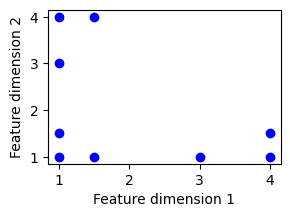

In [173]:
pl.figure(figsize=(3, 2))
pl.plot(X[:, 0], X[:, 1], 'bo')  # first argument: X[:, 0] represents a vector with all 
                                 # values of the first feature dimension
                                 # second argument: X[:, 1] ... second feature dimension
                                 # 'bo' includes 'b' for blue and 'o' for circle-shaped markers
pl.xlabel('Feature dimension 1')
pl.ylabel('Feature dimension 2')
pl.show()

We first need an instance of the **KMeans** class. 

Here, we need to define the number of clusters that we expect.
Remember, a **cluster** is a group of close data points.
If we look to the image above, we see 3 clusters of 3 points each, so we set ```n_clusters=3```.

In [174]:
kmeans_clustering = skl.cluster.KMeans(n_clusters=3)

Now we "fit" the clustering algorithm to the data such that it can find the most likely clusters. 

In [175]:
kmeans_clustering.fit(X)

KMeans(n_clusters=3)

Let's look at the algorithm's **predictions**, which are the expected **cluster numbers** each data point is assigned to.

In [176]:
cluster_numbers = kmeans_clustering.predict(X)
print(cluster_numbers)

[0 0 0 1 1 1 2 2 2]


We can see that the algorith assigned the first three datapoints to a cluster with the number $2$, the second three to cluster $1$, and the final three points to cluster $0$. The order of the class numbers are not important here. What's important is, which data points end up in the same cluster.

Let's visualize this again, this time, we use unique marker shapes and colors for data points in the same cluster.

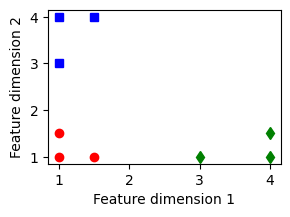

In [177]:
pl.figure(figsize=(3, 2))
marker_colors = ['r', 'b', 'g']  # red, blue, and green markers
marker_shape = ['o', 's', 'd']  # circle, square, diamond shaped markers

# now we iterate over all data points and plot them one-by-one
for i in range(n_items):
    # which cluster number is this data point assigned to?
    current_cluster_num = cluster_numbers[i]
    pl.plot(X[i, 0], X[i, 1], 
            marker=marker_shape[current_cluster_num], 
            color=marker_colors[current_cluster_num])
pl.xlabel('Feature dimension 1')
pl.ylabel('Feature dimension 2')
pl.show()

Nice :) This result fits our initial observation, that we as humans can recognize three clusters in the dataset.

### Supervised Learning - Classification

Now, we want to use the $k$-Nearest-Neighbor classification algorithm discussed in the lecture.
We start with the dataset from before, now with class labels.

We first need a **training set** which we will use to train our classification model.
The training set consists of a feature matrix ```X_train```, which contains for each data point the feature vector, and a target vector ```y_train```, which contains for each data point the corresponding class index / number.
We will re-use our dataset from before, now with labels.

In [178]:
X_train = np.array(((1,1),
                    (1, 1.5),
                    (1.5, 1),
                    (1, 3),
                    (1, 4),
                    (1.5, 4),
                    (3, 1),
                    (4, 1),
                    (4, 1.5)))

y_train = np.array((0, 0, 0, 1, 1, 1, 2, 2, 2))

# number of training examples
n_train = len(y_train)

Furthermore, we need a **test set**, which we will use to evaluate our classifier later.

In [179]:
X_test = np.array(((1.2, 1.2),
                   (1.7, 2.7),
                   (2, 2),
                   (2, 3),
                   (3, 3),
                   (3.5, 1.5)))

y_test = np.array((0, 1, 0, 1, 2, 2))

# number of test examples
n_test = len(y_test)

Let's plot the training dataset and the test data points without labels first.

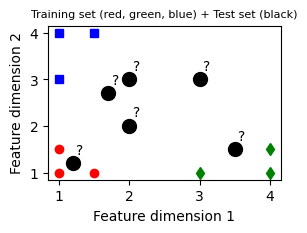

In [180]:
pl.figure(figsize=(3, 2))

# again, unique marker colors and shapes for our classes
marker_colors = ['r', 'b', 'g']  
marker_shape = ['o', 's', 'd']  

# plot the training dataset
for i in range(n_train):
    # which cluster number is this data point assigned to?
    current_cluster_num = cluster_numbers[i]
    pl.plot(X_train[i, 0], X_train[i, 1], 
            marker=marker_shape[current_cluster_num], 
            color=marker_colors[current_cluster_num])
    
# plot the test dataset (but without labels for now)
for i in range(n_test):
    pl.plot(X_test[i, 0], X_test[i, 1], 'ko', markersize=10)
    pl.text(X_test[i, 0]+.05, X_test[i, 1]+.2, '?')

pl.title('Training set (red, green, blue) + Test set (black)', fontsize=8)
pl.xlabel('Feature dimension 1')
pl.ylabel('Feature dimension 2')
pl.show()

Now, let's train our **classifier**:
1. At first, we will import the Python class of the **kNN classifier** from scikit learn. Note, that we need to specify the number of nearest neighbors to consider.
2. Then, we use the **.fit()** function to train the classifier using the training data
3. We call the **.predict()** function of our trained classifier to make predictions on the test data, i.e., estimate the class index that each test item refers to.

In [181]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_test_predict = classifier.predict(X_test)

print("Here are the class predictions for the test set: ", y_test_predict)
print("Here are the true class indices for the test set: ", y_test)



Here are the class predictions for the test set:  [0 1 0 1 1 2]
Here are the true class indices for the test set:  [0 1 0 1 2 2]


What do we observe? The results are not perfect, the classifier makes one incorrect classification (pre-last item). We will evalute this with 2 approaches:
1. Accuracy
2. Confusion matrix

#### Accuracy

Accuracy is the percentage of all test items, which were classified correctly. A perfect classifier will give an accuracy of $A=1$.

In [182]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_predict)

print("Accuracy score = ", accuracy)

Accuracy score =  0.8333333333333334


#### Confusion matrix

The **confusion matrix** shows in detail, which classes are affected by the classification errors.

In [183]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_test_predict)

print("Confusion matrix: ")
print(conf_mat)

Confusion matrix: 
[[2 0 0]
 [0 2 0]
 [0 1 1]]


We can also use a build-in function in **scikit-learn** to plot it.

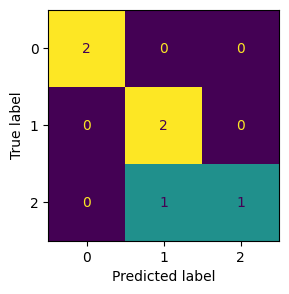

In [184]:
from sklearn.metrics import plot_confusion_matrix

fig = pl.figure(figsize=(3,3))
plot_confusion_matrix(classifier, X_test, y_test, ax=fig.gca(), colorbar=False)
pl.show()

The confusion matrix shows the correct labels in the rows and the predicted labels in the columns. Here we can observe, that classes 0 and 1 were classified correcty. Our only classification error was between classes 2 and 1.

## Audio Classification Example

Let's use our skills on audio processing and machine learning to implement an **animal classification algorithm** :)
The dataset used here is a manual selection of 5 examples for 5 animal classes from the https://github.com/karolpiczak/ESC-50 dataset.

As the first step, let's get a list of sound classes (animal types) and for each class, a list of audio files.

In [185]:
import glob
dir_dataset = 'audio/animal_sounds'
sub_directories = glob.glob(os.path.join(dir_dataset, '*'))
n_sub = len(sub_directories)
# let's collect the files in each subdirectory
# the folder name is the class name
fn_wav_list = []
class_label = []
file_num_in_class = []

for i in range(n_sub):
    current_class_label = os.path.basename(sub_directories[i])
    current_fn_wav_list = sorted(glob.glob(os.path.join(sub_directories[i], '*.wav')))
    for k, fn_wav in enumerate(current_fn_wav_list):
        fn_wav_list.append(fn_wav)
        class_label.append(current_class_label)
        file_num_in_class.append(k)

n_files = len(class_label)
print('Here is our list of audio files, sorted by sound classes:')
for i in range(n_files):
    print(class_label[i], '-', fn_wav_list[i])
    
# this vector includes a "counter" for each file within its class, we use it later ...
file_num_in_class = np.array(file_num_in_class)

Here is our list of audio files, sorted by sound classes:
cat - audio/animal_sounds\cat\1-34094-B-5.wav
cat - audio/animal_sounds\cat\1-47819-A-5.wav
cat - audio/animal_sounds\cat\1-56380-A-5.wav
cat - audio/animal_sounds\cat\1-79113-A-5.wav
cat - audio/animal_sounds\cat\2-110010-A-5.wav
cow - audio/animal_sounds\cow\3-124376-A-3.wav
cow - audio/animal_sounds\cow\3-126358-A-3.wav
cow - audio/animal_sounds\cow\3-152039-A-3.wav
cow - audio/animal_sounds\cow\3-160993-A-3.wav
cow - audio/animal_sounds\cow\4-174860-A-3.wav
dog - audio/animal_sounds\dog\2-114280-A-0.wav
dog - audio/animal_sounds\dog\2-117271-A-0.wav
dog - audio/animal_sounds\dog\2-118072-A-0.wav
dog - audio/animal_sounds\dog\2-122104-A-0.wav
dog - audio/animal_sounds\dog\3-136288-A-0.wav
frog - audio/animal_sounds\frog\1-18757-A-4.wav
frog - audio/animal_sounds\frog\1-31836-A-4.wav
frog - audio/animal_sounds\frog\2-32515-A-4.wav
frog - audio/animal_sounds\frog\2-52085-A-4.wav
frog - audio/animal_sounds\frog\3-70962-A-4.wav
i

Let's listen to one example per class...

In [186]:
for i in range(5):
    idx = 5*i  # always take the first one per class
    x, fs = librosa.load(fn_wav_list[idx])
    print(class_label[idx])
    ipd.display(ipd.Audio(data=x, rate=fs))

cat


cow


dog


frog


insect


We need to get a class ID for each file (which is a number that represents its class)

In [187]:
unique_classes = sorted(list(set(class_label)))
print("All unique class labels (sorted alphabetically)", unique_classes)

# now we can iterate over all files and look for the index of its class in this list
class_id = np.array([unique_classes.index(_) for _ in class_label])

print("Class IDs of all files", class_id)

All unique class labels (sorted alphabetically) ['cat', 'cow', 'dog', 'frog', 'insect']
Class IDs of all files [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


Let's check the MFCC feature for the first file.

In [188]:
x, fs = librosa.load(fn_wav_list[0])
mfcc = librosa.feature.mfcc(y=x, n_mfcc=13)
print("Shape of MFCC matrix", mfcc.shape)
# let's average it over time to get a global feature vector which measures 
# the overall timbre of the audio file
feature_vector = np.mean(mfcc, axis=1)
print("Shape of our final feature vector", feature_vector.shape)

Shape of MFCC matrix (13, 216)
Shape of our final feature vector (13,)


Let's do this over all files and combine all **feature vectors** to a **feature matrix** (*this takes a couple of seconds to compute*).

In [189]:
feature_matrix = []
for i, fn_wav in enumerate(fn_wav_list):
    x, fs = librosa.load(fn_wav)
    mfcc = librosa.feature.mfcc(y=x, n_mfcc=13)
    # store current feature vector
    feature_matrix.append(np.mean(mfcc, axis=1))
# by now, feature_matrix is just a list of one-dimensional numpy arrays.
# let's convert it into a two-dimensional array (feature matrix)
feature_matrix = np.vstack(feature_matrix) # vertically stacking - row-by-row
print("Final shape of our feature matrix", feature_matrix.shape)

Final shape of our feature matrix (25, 13)


The final shape is ```(25 x 13)``` and covers 25 test items (as we have audio files) with 13 feature dimensions.

Now, we need to split the data into a **training set** and a **test set**.

We use the ```file_num_in_class``` variable from before, which has a counter for each file within it's class files. We will use the first three files in each class as training set and the last two as test set. We use boolean operations to get two masks.

In [190]:
print("Remember how it looks like:", file_num_in_class)  # starts at 0 for the first file in each class, etc...

Remember how it looks like: [0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]


In [191]:
is_train = np.where(file_num_in_class <= 2)[0]
is_test = np.where(file_num_in_class >= 3)[0]

print("Indices of the training set items:", is_train)
print("Indices of the test set items:", is_test)


Indices of the training set items: [ 0  1  2  5  6  7 10 11 12 15 16 17 20 21 22]
Indices of the test set items: [ 3  4  8  9 13 14 18 19 23 24]


Now that we have splitted our dataset, we can generate the feature matrix and target vectors for the training and test set.

In [192]:
X_train = feature_matrix[is_train, :]
y_train = class_id[is_train]
X_test = feature_matrix[is_test, :]
y_test = class_id[is_test]

print("Let's look at the dimensions")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Let's look at the dimensions
(15, 13)
(15,)
(10, 13)
(10,)


Let's normalize our feature matrix first, this makes sure that all feature dimensions (columns in the feature matrix) have a mean of 0 and a standard deviation of 1. This makes it easier for the classifier.

In [193]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)

print("Let's check the mean and standard deviation values over our training set feature matrix for each feature dimension BEFORE...")
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))
print("and AFTER the normalization ...")
print(np.mean(X_train_norm, axis=0))
print(np.std(X_train_norm, axis=0))


Let's check the mean and standard deviation values over our training set feature matrix for each feature dimension BEFORE...
[-279.44818     90.458305   -29.535435     4.5389423   -2.7728844
    6.684372    -0.5487004    3.2385454   -4.1590295   -2.1292627
   -5.2643595    0.7471706   -1.2480074]
[116.455894   44.889748   32.271313   13.678443   16.985209   11.520774
  12.864263   17.054285    8.417358    6.1358147   7.2719855   7.821259
   5.8840947]
and AFTER the normalization ...
[-1.58945728e-08 -4.96705388e-09  7.94728638e-09 -7.94728638e-09
  1.58945728e-08  1.58945728e-08  1.39077505e-08  1.09275184e-08
  1.49011612e-08 -1.51495136e-08  2.28484467e-08  0.00000000e+00
  2.18550369e-08]
[0.99999994 1.         0.99999994 1.         1.         1.
 1.         1.         1.         1.         1.         0.99999994
 1.        ]


Let's train our classifier on the training set and compute predictions on the test set.

This time, we use a **Random Forest Classifier**. More infos can be found here:
  - https://en.wikipedia.org/wiki/Random_forest
  - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  
Similar to the k-Nearest-Neighbor classifier, it implements a **.fit()** and a **.predict()** method.  

In [198]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=30)
classifier.fit(X_train_norm, y_train)

# apply the normalization learnt from the training set
X_test_norm = scaler.transform(X_test)
y_test_predict = classifier.predict(X_test_norm)

print("Here are the class predictions for the test set: ", y_test_predict)
print("Here are the true class indices for the test set: ", y_test)

Here are the class predictions for the test set:  [2 2 1 1 2 0 3 0 1 0]
Here are the true class indices for the test set:  [0 0 1 1 2 2 3 3 4 4]


For the **evaluation**, we will compute the **accuracy** and the **confusion matrix**

In [199]:
accuracy = accuracy_score(y_test, y_test_predict)
print("Accuracy score = ", accuracy)

Accuracy score =  0.4


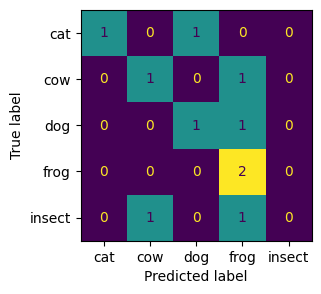

In [200]:
fig = pl.figure(figsize=(3,3))
plot_confusion_matrix(classifier, X_test, y_test, ax=fig.gca(), colorbar=False)
ticks = np.arange(5)
pl.xticks(ticks, unique_classes)
pl.yticks(ticks, unique_classes)
pl.show()

How to further improve this algorithm?
  - use more data (check the https://github.com/karolpiczak/ESC-50, which provides 40 examples for each class)
  - try a different classifier (e.g. Support Vector Machines https://scikit-learn.org/stable/modules/svm.html)
  - try different features 